<a href="https://colab.research.google.com/github/timmderrickson/Boston-Housing-Prices/blob/master/MaskFiller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and Data Import

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import math
from os import listdir
from os.path import isfile, join
import pandas as pd

In [2]:
nuc_dir = '/content/drive/MyDrive/Assets/Images/nuclei'
cell_dir = '/content/drive/MyDrive/Assets/Images/cells'
orig_dir = '/content/drive/MyDrive/Assets/Images/original'
csv_dir = '/content/drive/MyDrive/Assets/csv'

In [3]:
s1_dir = join(csv_dir, 's1')
s2_dir = join(csv_dir, 's2')
s3_dir = join(csv_dir, 's3')
s4_dir = join(csv_dir, 's4')

In [4]:
nuclei_images = [f for f in listdir(nuc_dir)]
cell_images = [f for f in listdir(cell_dir)]
orig_images = [f for f in listdir(orig_dir)]

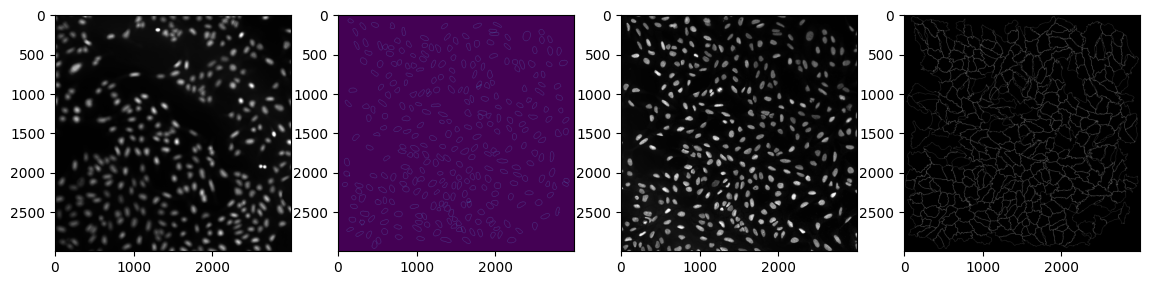

In [5]:
nuc = cv2.imread(join(nuc_dir, nuclei_images[2]))
nuc_single = nuc[:,:,0]

cell = cv2.imread(join(cell_dir, cell_images[2]))
cell_single = cell[:,:,0]

nuc_org = cv2.imread(join(orig_dir, orig_images[0]), -1)  # these aren't quite right, need to recheck the indices
cell_org = cv2.imread(join(orig_dir, orig_images[2]), -1)  # these aren't quite right, need to recheck the indices

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,5))
ax1.imshow(nuc_org, cmap='gray')
ax2.imshow(nuc_single)
ax3.imshow(cell_org, cmap='gray')
ax4.imshow(cell_single, cmap='gray')
plt.show()

In [6]:
nuc_df = pd.read_csv(join(s1_dir, 'Nuclei.csv'))
nuc_df.drop(list(nuc_df)[10:], axis=1, inplace=True)
nuc_df['Center_XY'] = list(zip(nuc_df.AreaShape_Center_X, nuc_df.AreaShape_Center_Y))
nuc_df.head()

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,Center_XY
0,1,1,2774,3850,196,102,126,47,159.540735,75.207282,"(159.5407354001442, 75.2072819033886)"
1,1,2,3211,7276,2079,159,1972,91,2023.778885,122.518530,"(2023.7788850825289, 122.518530052943)"
2,1,3,4178,5796,516,158,424,95,470.195309,125.257061,"(470.19530876017234, 125.25706079463858)"
3,1,4,3705,6853,355,187,278,98,316.626451,140.413225,"(316.6264507422402, 140.41322537112012)"
4,1,5,4510,6720,1824,167,1719,103,1771.318182,135.448780,"(1771.3181818181818, 135.44878048780487)"


In [7]:
cell_df = pd.read_csv(join(s1_dir, 'Cells.csv'))
cell_df.drop(list(cell_df)[10:], axis=1, inplace=True)
cell_df['Center_XY'] = list(zip(cell_df.AreaShape_Center_X, cell_df.AreaShape_Center_Y))
cell_df.head()

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,Center_XY
0,1,1,9467,18326,243,127,89,8,163.129291,71.632830,"(163.12929122214007, 71.63282982993556)"
1,1,2,19820,45568,2173,212,1917,34,2044.817810,115.393744,"(2044.8178102926336, 115.39374369323916)"
2,1,3,18036,41300,581,235,345,60,472.148536,135.217731,"(472.1485362608117, 135.21773120425814)"
3,1,4,23691,50032,449,287,237,51,344.465409,159.485796,"(344.4654088050315, 159.4857962939513)"
4,1,5,28486,83268,1933,274,1609,17,1784.257635,151.600927,"(1784.2576353296356, 151.60092677104544)"


# EDA

In [8]:
nuc.shape

(3000, 3000, 3)

In [9]:
np.unique(nuc, return_counts=True)

(array([  0, 255], dtype=uint8), array([26797680,   202320]))

In [10]:
print(nuc[:, :, 0].max(),nuc[:, :, 1].max(),nuc[:, :, 2].max())

255 255 255


In [11]:
for image in nuclei_images:
  nuc_img = cv2.imread(join(nuc_dir, image))
  print(nuc_img.shape)
  print(np.unique(nuc_img, return_counts=True))
  print(nuc_img[:, :, 0].max(),nuc_img[:, :, 1].max(),nuc_img[:, :, 2].max())

(3000, 3000, 3)
(array([  0, 255], dtype=uint8), array([26728035,   271965]))
255 255 255
(3000, 3000, 3)
(array([  0, 255], dtype=uint8), array([26778591,   221409]))
255 255 255
(3000, 3000, 3)
(array([  0, 255], dtype=uint8), array([26797680,   202320]))
255 255 255
(3000, 3000, 3)
(array([  0, 255], dtype=uint8), array([26805270,   194730]))
255 255 255


# Floodfill

In [12]:
nuc_floodfill = nuc_single.copy()
nuc_floodfill = nuc_floodfill[:200,100:300]
h, w = nuc_floodfill.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

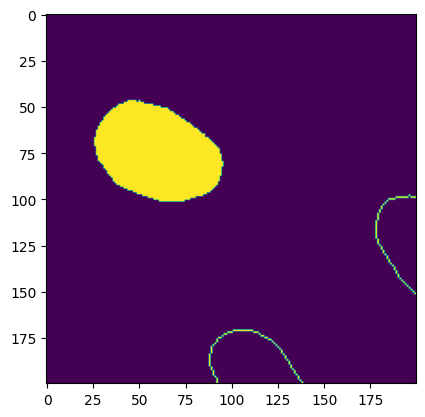

In [13]:
cv2.floodFill(nuc_floodfill, mask, (75,75), (255))
plt.imshow(nuc_floodfill)

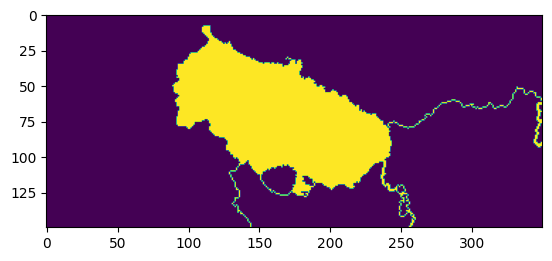

In [14]:
cell_floodfill = cell_single.copy()
cell_floodfill = cell_floodfill[:150,:350]
h, w = cell_floodfill.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(cell_floodfill, mask, (150,50), (255))
plt.imshow(cell_floodfill)

# PloyFill

[  0 255]


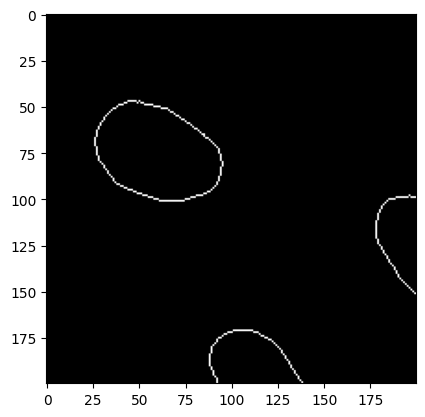

In [15]:
single_fill = nuc_single[:200,100:300]
plt.imshow(single_fill, cmap='gray')
print(np.unique(single_fill))

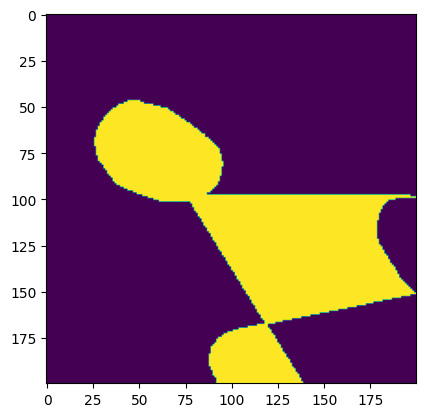

In [16]:
mask = np.zeros((200,200))
contours = np.where(single_fill == 255)
stacked = np.column_stack((contours[1], contours[0]))

cv2.fillPoly(mask, pts = [stacked], color=(255))
plt.imshow(mask)

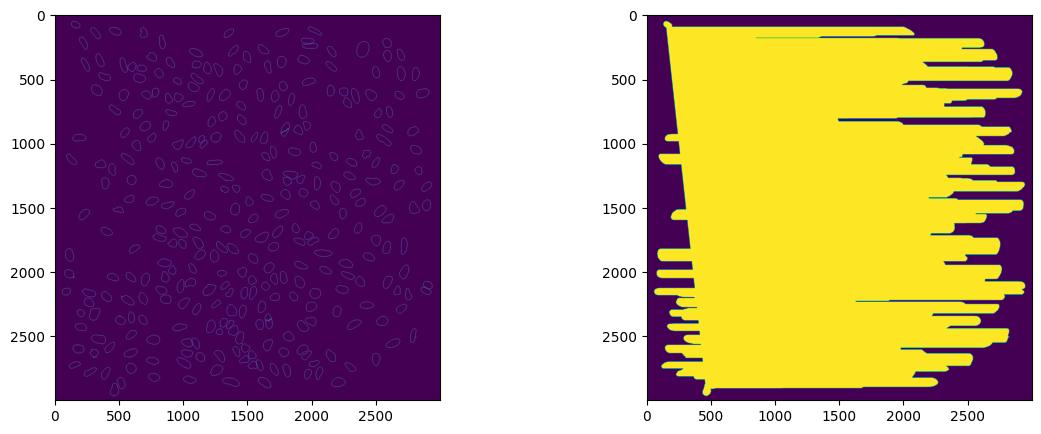

In [17]:
mask = nuc_single.copy()
contours = np.where(nuc_single == 255)
stacked = np.column_stack((contours[1], contours[0]))

cv2.fillPoly(mask, pts = [stacked], color=(255))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.imshow(nuc_single)
ax2.imshow(mask)
plt.show()

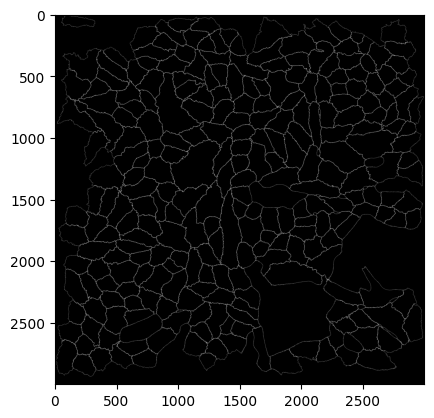

In [18]:
cell = cv2.imread(join(cell_dir, cell_images[0]))
cell_single = cell[:,:,0]
plt.imshow(cell_single, cmap='gray')

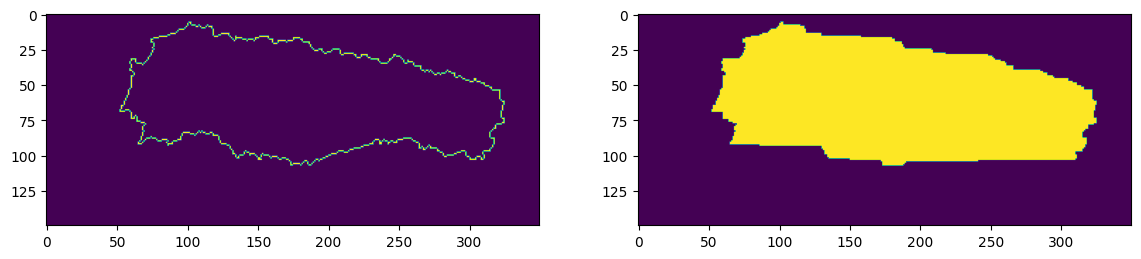

In [19]:
mask = cell_single.copy()
mask = mask[:150,:350]
contours = np.where(cell_single[:150,:350] == 255)
stacked = np.column_stack((contours[1], contours[0]))

cv2.fillPoly(mask, pts = [stacked], color=(255))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.imshow(cell_single[:150,:350])
ax2.imshow(mask)
plt.show()

# PolyFill with CSV

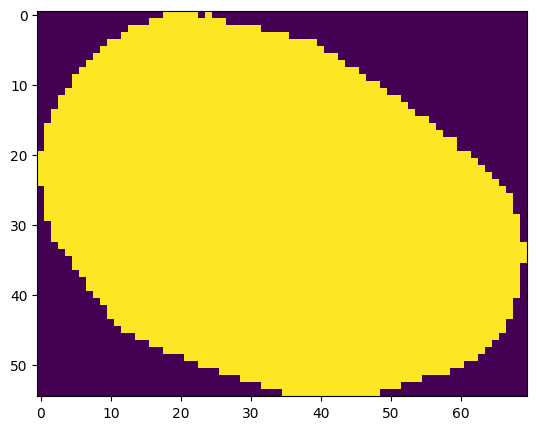

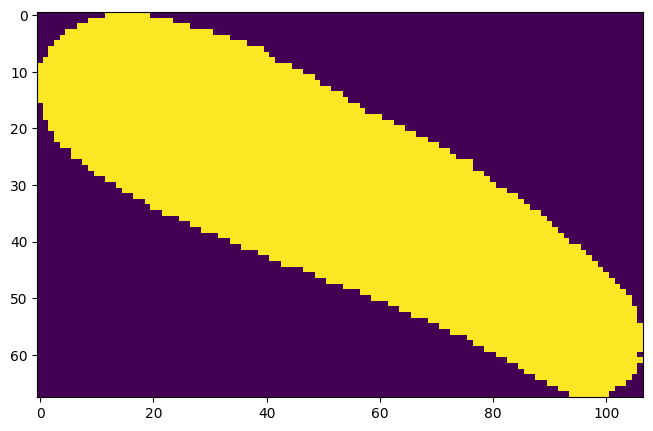

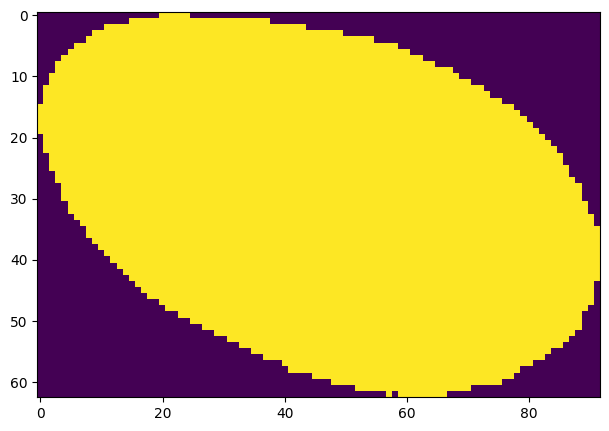

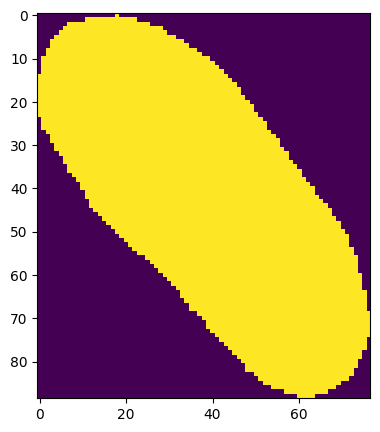

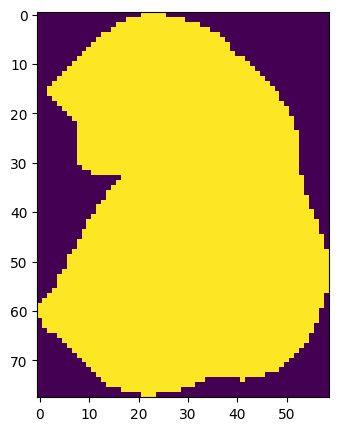

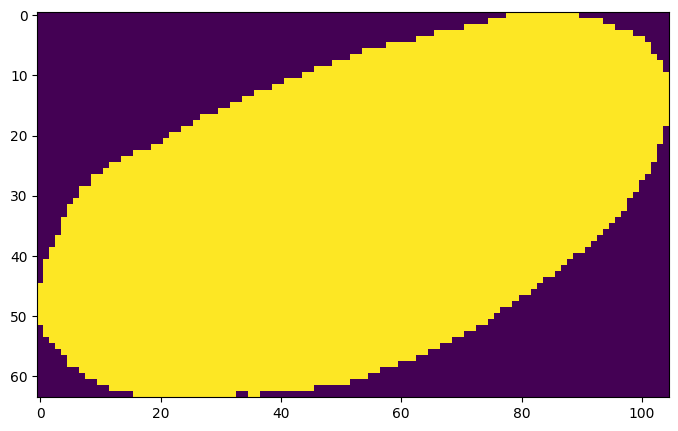

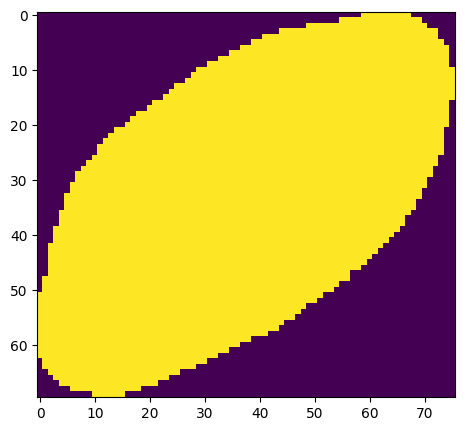

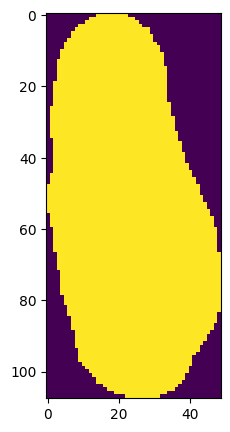

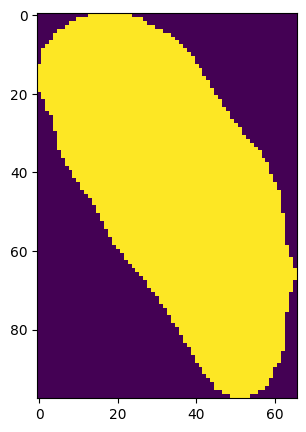

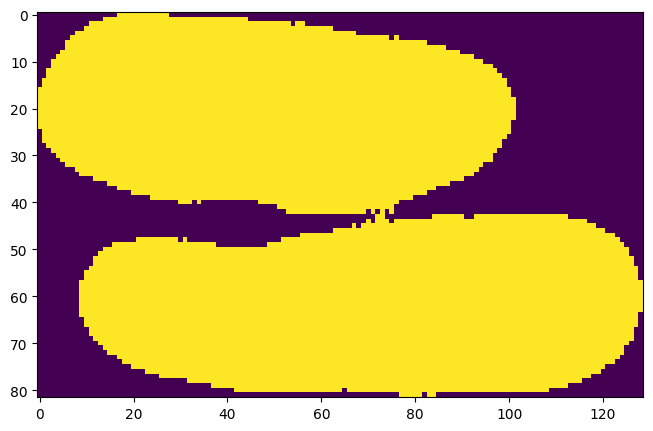

307 314


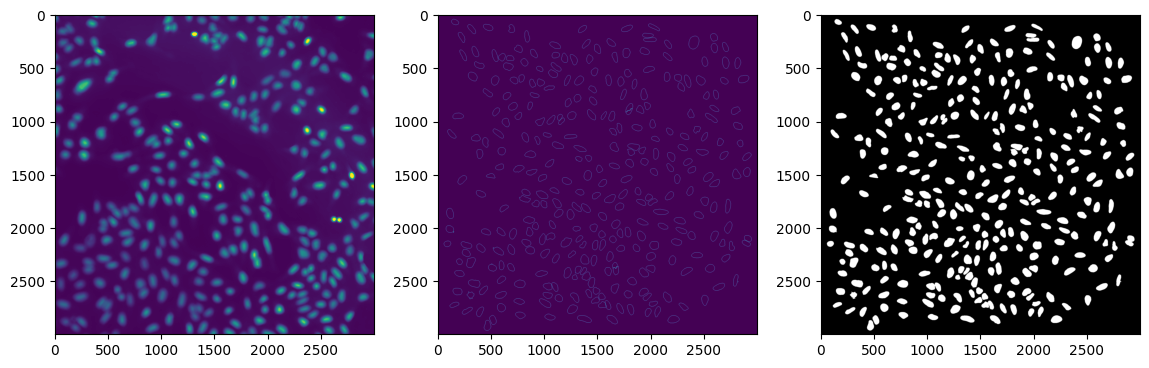

In [20]:
nuc_floodfill = nuc_single.copy()
h, w = nuc_floodfill.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

connectivity = 4

num_labels, b_box, stats, centroid = cv2.connectedComponentsWithStats(
    nuc_floodfill, connectivity, cv2.CV_32S
)

masks = []

for item in nuc_df.Center_XY:

  x = int(item[0])
  y = int(item[1])

  cv2.floodFill(nuc_floodfill, mask, (x, y), (255))

for item in stats[1:]:
  x = int(item[0])
  y = int(item[1])
  w = int(item[2])
  h = int(item[3])

  # cv2.rectangle(nuc_floodfill, (x, y), (x + w, y + h), (255, 255, 255), 10)

  temp_nuc_mask = nuc_floodfill[y:y+h, x:x+w]

  masks.append(temp_nuc_mask)

for mask_img in masks[:10]:
  fig, (ax1) = plt.subplots(1, 1, figsize=(14,5))
  ax1.imshow(mask_img)
  plt.show()

print(len(masks), len(nuc_df.Center_XY))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,5))
ax1.imshow(nuc_org)
ax2.imshow(nuc_single)
ax3.imshow(nuc_floodfill, cmap='gray')
plt.show()

[[      0       0    3000    3000 8764400]
 [     52       6     273     102   17973]
 [      4      22    2989    2917  217627]]
[[1502.81743428 1504.76510337]
 [ 181.6898125    60.16263284]
 [1474.73138903 1406.33021178]]


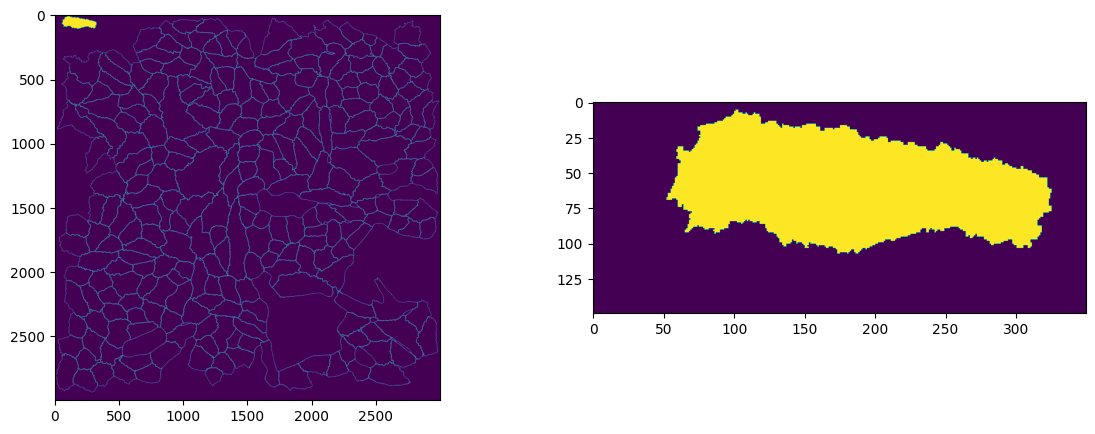

In [21]:
cell_floodfill = cell_single.copy()
h, w = cell_floodfill.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

connectivity = 8

for item in cell_df.Center_XY[:1]:

  cell_floodfill_copy = cell_floodfill.copy()

  x = int(item[0])
  y = int(item[1])

  cv2.floodFill(cell_floodfill_copy, mask, (x, y), (255))

  num_labels, b_box, stats, centroid = cv2.connectedComponentsWithStats(
      cell_floodfill_copy, connectivity, cv2.CV_32S
  )

  print(stats)

  print(centroid)

  cv2.circle(cell_floodfill_copy, (int(centroid[1][0]), int(centroid[1][1])), 15, (255, 255, 255), 10)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
  ax1.imshow(cell_floodfill_copy)
  ax2.imshow(b_box[:150,:350])
  plt.show()

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,5))
# ax1.imshow(cell_org)
# ax2.imshow(cell_single)
# ax3.imshow(cell_floodfill, cmap='gray')
# plt.show()

In [22]:
nuclei_images

['A1_s3--nuclei_outlines.png',
 'A1_s4--nuclei_outlines.png',
 'A1_s1--nuclei_outlines.png',
 'A1_s2--nuclei_outlines.png']

# 3-Channel PolyFill Connected

In [23]:
nuc_copy = nuc.copy()

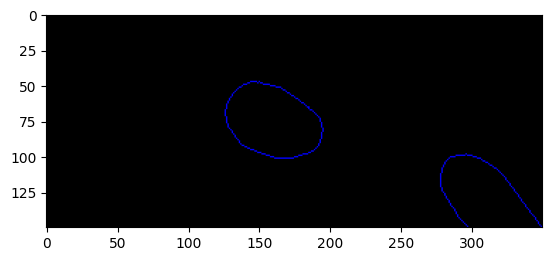

In [24]:
nuc_copy[:,:,0] = 0
nuc_copy[:,:,1] = 0
plt.imshow(nuc_copy[:150,:350])

In [25]:
print(nuc_copy[:, :, 0].max(),nuc_copy[:, :, 1].max(),nuc_copy[:, :, 2].max())

0 0 255


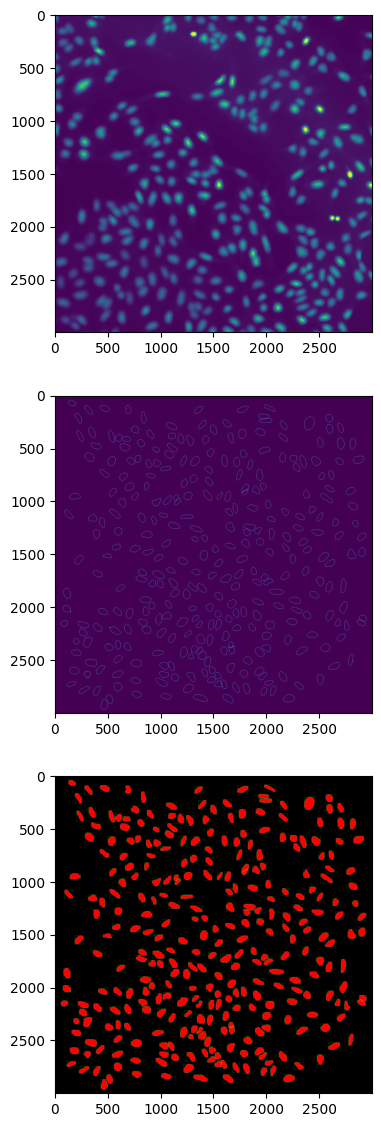

In [26]:
nuc_copy = nuc.copy()
h, w = nuc_copy.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

for item in nuc_df.Center_XY:

  x = int(item[0])
  y = int(item[1])

  cv2.floodFill(nuc_copy, mask, (x, y), (255, 0, 0))

nuc_copy_no_outlines = nuc_copy.copy()
nuc_copy_no_outlines[nuc_copy[:,:,2] == 255] = 0

connectivity = 4

num_labels, b_box, stats, centroid = cv2.connectedComponentsWithStats(
    nuc_copy_no_outlines[:,:,0], connectivity, cv2.CV_32S
)

image_stats = []
masks = []
bounding_boxes = []


for index, item in enumerate(stats[1:]):
  x = int(item[0])
  y = int(item[1])
  w = int(item[2])
  h = int(item[3])

  temp_nuc_mask = nuc_copy[y:y+h, x:x+w]

  masks.append(temp_nuc_mask)

  bounding_box = [(x, y), (x + w, y + h)]

  bounding_boxes.append([(x, y), (x + w, y + h)])

  image_stats.append({"id": index + 1,
                      "mask": temp_nuc_mask,
                      "bounding_boxes": bounding_box,
                      "area": item[4],
                      "centroid": centroid[index + 1]})


for box in bounding_boxes:

  top_left, bottom_right = box
  cv2.rectangle(nuc_copy, top_left, bottom_right, (0, 255, 0), 1)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,14))
ax1.imshow(nuc_org)
ax2.imshow(nuc_single)
ax3.imshow(nuc_copy)
plt.show()

In [27]:
np.unique(nuc_copy[179:261, 1918:2047, 0], return_counts=True)
# plt.imshow(nuc_copy[179:261, 1918:2047, :])

(array([  0, 255], dtype=uint8), array([3427, 7151]))

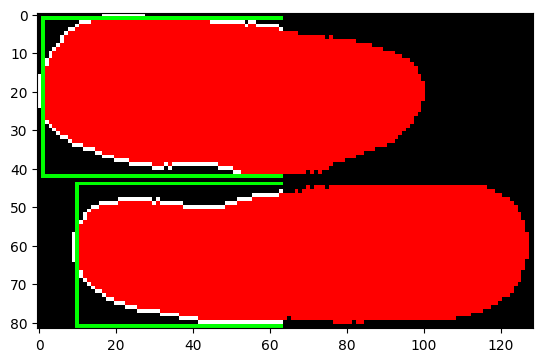

In [28]:
double_nuc = nuc_copy[179:261, 1918:2047, :]
red_nuc = double_nuc.copy()
red_nuc[:,:,1:] = 0
red_nuc[double_nuc[:,:,2] == 255] = 0

r_v_b_nuc = np.hstack((double_nuc[:, :64, :], red_nuc[:, 64:, :]))
plt.imshow(r_v_b_nuc)

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,4))
# ax1.imshow(r_v_b_nuc)
# ax2.imshow(nuc_copy[179:261, 1918:2047, :])
# plt.show()

# FindContours

## Nuclei

(100, 100, 3)


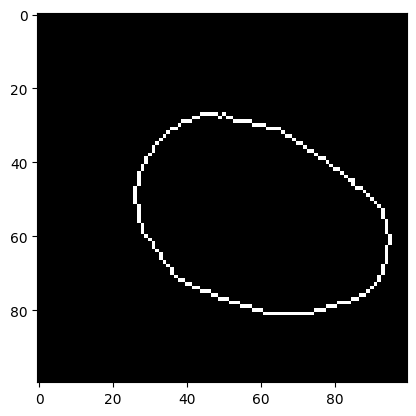

In [29]:
cont = nuc.copy()
test_nuc = cont[20:120,100:200]
plt.imshow(test_nuc)
print(test_nuc.shape)

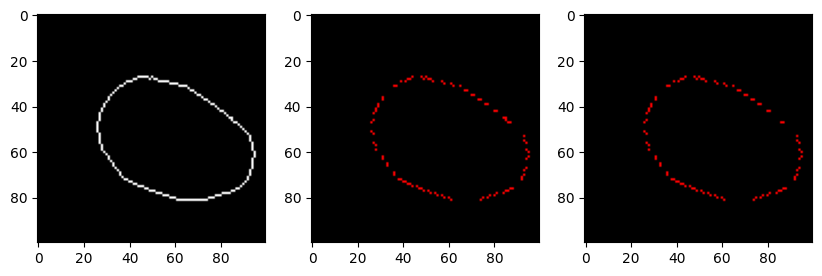

0.9999


In [30]:
contours, hierarchy = cv2.findContours(test_nuc[:,:,0], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
blank = np.zeros((test_nuc.shape))
cv2.drawContours(blank, contours[0], -1, (255), 1)
blank2 = np.zeros((test_nuc.shape))
cv2.drawContours(blank2, contours[1], -1, (255), 1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,14))
ax1.imshow(test_nuc)
ax2.imshow(blank)
ax3.imshow(blank2)
plt.show()

print(blank[blank == blank2].size / blank.size)

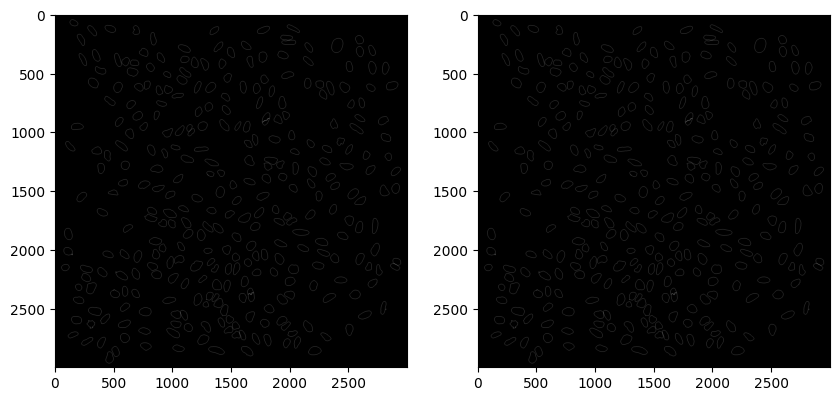

In [31]:
contours, hierarchy = cv2.findContours(cont[:,:,0], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
blank = np.zeros((cont.shape))
cv2.drawContours(blank, contours, -1, (255, 255, 255), 1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,14))
ax1.imshow(cont)
ax2.imshow(blank)
plt.show()

In [32]:
# pixel accuracy
cont[cont == blank].size / cont.size

0.9999986666666667

In [33]:
one = contours[0]
two = contours[1]
print(type(one), one.shape)
one = np.squeeze(one)
print(type(one), one.shape)
one = one.tolist()
print(type(one))
print(type(one[0]))

<class 'numpy.ndarray'> (124, 1, 2)
<class 'numpy.ndarray'> (124, 2)
<class 'list'>
<class 'list'>


## Cells

(150, 350, 3)


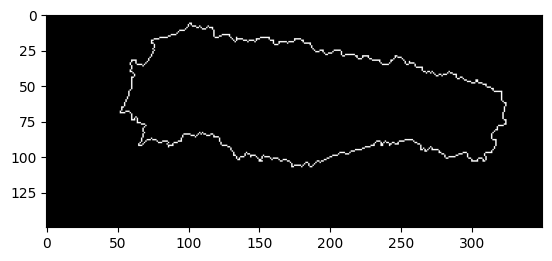

In [43]:
contour_cell = cell.copy()
test_cell = contour_cell[:150,:350]
plt.imshow(test_cell)
print(test_cell.shape)

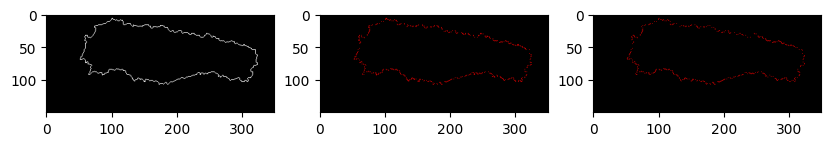

0.9989206349206349


In [45]:
contours, hierarchy = cv2.findContours(test_cell[:,:,0], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
blank = np.zeros((test_cell.shape))
cv2.drawContours(blank, contours[0], -1, (255), 1)
blank2 = np.zeros((test_cell.shape))
cv2.drawContours(blank2, contours[1], -1, (255), 1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,14))
ax1.imshow(test_cell)
ax2.imshow(blank)
ax3.imshow(blank2)
plt.show()

print(blank[blank == blank2].size / blank.size)

# Function

In [34]:
def nucleiMaskFiller(img):
  nuc_copy = img.copy()
  h, w = nuc_copy.shape[:2]
  mask = np.zeros((h+2, w+2), np.uint8)

  for item in nuc_df.Center_XY:

    x = int(item[0])
    y = int(item[1])

    cv2.floodFill(nuc_copy, mask, (x, y), (255, 0, 0))

  nuc_copy_no_outlines = nuc_copy.copy()
  nuc_copy_no_outlines[nuc_copy[:,:,2] == 255] = 0

  connectivity = 4

  num_labels, b_box, stats, centroid = cv2.connectedComponentsWithStats(
      nuc_copy_no_outlines[:,:,0], connectivity, cv2.CV_32S
  )

  image_stats = []
  masks = []
  bounding_boxes = []


  for index, item in enumerate(stats[1:]):
    x = int(item[0])
    y = int(item[1])
    w = int(item[2])
    h = int(item[3])

    temp_nuc_mask = nuc_copy[y:y+h, x:x+w]

    masks.append(temp_nuc_mask)

    bounding_box = [(x, y), (x + w, y + h)]

    bounding_boxes.append([(x, y), (x + w, y + h)])

    image_stats.append({"id": index + 1,
                        "mask": temp_nuc_mask,
                        "bounding_box": bounding_box,
                        "area": item[4],
                        "connected_components_centroid": centroid[index + 1]})


  for box in bounding_boxes:

    top_left, bottom_right = box
    cv2.rectangle(nuc_copy, top_left, bottom_right, (0, 255, 0), 1)

  return image_stats, nuc_copy

In [101]:
def dataframeread(dir_path, filename):
  df = pd.read_csv(join(dir_path, filename))
  df.drop(list(df)[10:], axis=1, inplace=True)
  df = df[df.AreaShape_Center_X.notna()]
  df['Center_XY'] = list(zip(df.AreaShape_Center_X, df.AreaShape_Center_Y))

  return df

In [106]:
def maskAndPolygonGenerator(img, image_id=None, dataframe=None):
  nuc_copy = img.copy()
  h, w = nuc_copy.shape[:2]
  mask = np.zeros((h+2, w+2), np.uint8)

  # create the output files
  image_stats = {
      'image_id': image_id,
      'contours': None,
      'hierarchy': None,
      'centroids_from_Broad': dataframe.Center_XY,
      'individual_object_ids': None,
      'masks': None,
      'bounding_boxes': None,
      'areas': None,
      'connected_components_centroids': None
      }

  individual_object_ids = []
  masks = []
  bounding_boxes = []
  areas = []
  connected_components_centroids= []


  # get contours for each object and the hierarchy
  contours, hierarchy = cv2.findContours(nuc_copy[:,:,0], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  image_stats['contours'] = contours
  image_stats['hierarchy'] = hierarchy

  # floodfill the individual objects to create masks using Broad generated centroids
  for item in dataframe.Center_XY:

    x = int(item[0])
    y = int(item[1])

    cv2.floodFill(nuc_copy, mask, (x, y), (255, 0, 0))

  # create a version of the masks without the original outlines to remove connectivity
  nuc_copy_no_outlines = nuc_copy.copy()
  nuc_copy_no_outlines[nuc_copy[:,:,2] == 255] = 0

  # do connected components to create bounding boxes, estimated centroids, and alternate masks
  connectivity = 4

  num_labels, b_box, stats, centroid = cv2.connectedComponentsWithStats(
      nuc_copy_no_outlines[:,:,0], connectivity, cv2.CV_32S
  )

  for index, item in enumerate(stats[1:]):
    x = int(item[0])
    y = int(item[1])
    w = int(item[2])
    h = int(item[3])

    individual_object_ids.append(index+1)

    temp_nuc_mask = nuc_copy[y:y+h, x:x+w]

    masks.append(temp_nuc_mask)

    bounding_box = [(x, y), (x + w, y + h)]

    bounding_boxes.append(bounding_box)

    areas.append(item[4])

    connected_components_centroids.append(centroid[index + 1])


  for box in bounding_boxes:

    top_left, bottom_right = box
    cv2.rectangle(nuc_copy, top_left, bottom_right, (0, 255, 0), 1)

  image_stats['individual_object_ids'] = individual_object_ids
  image_stats['masks'] = masks
  image_stats['bounding_boxes'] = bounding_boxes
  image_stats['areas'] = areas
  image_stats['connected_components_centroids'] = connected_components_centroids

  return image_stats, nuc_copy

# Trying All Nuclei Images

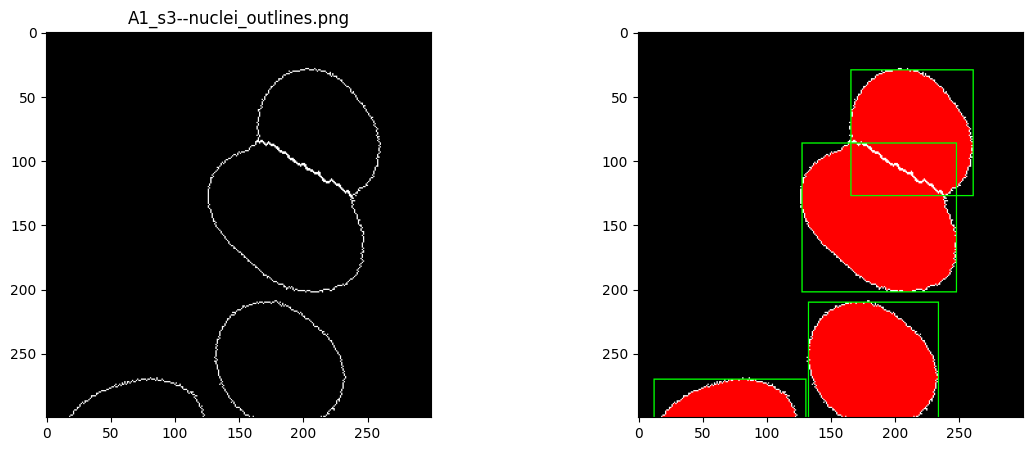

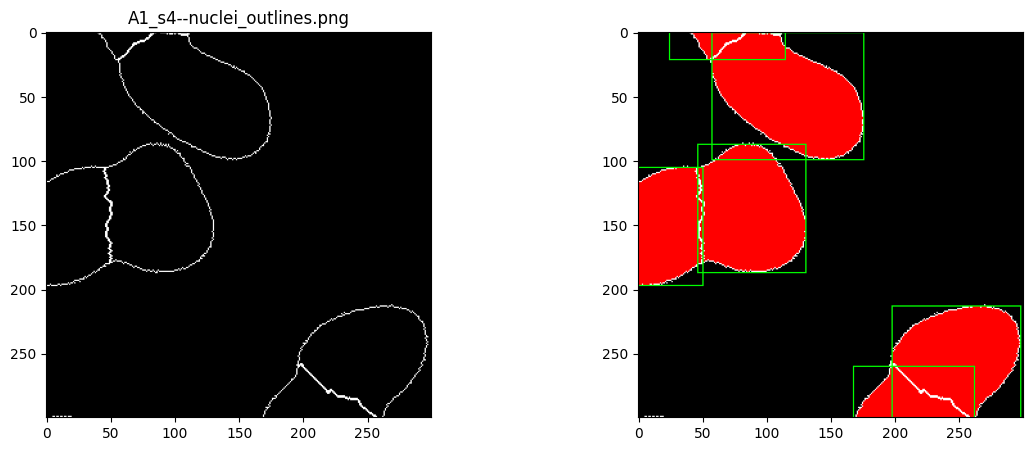

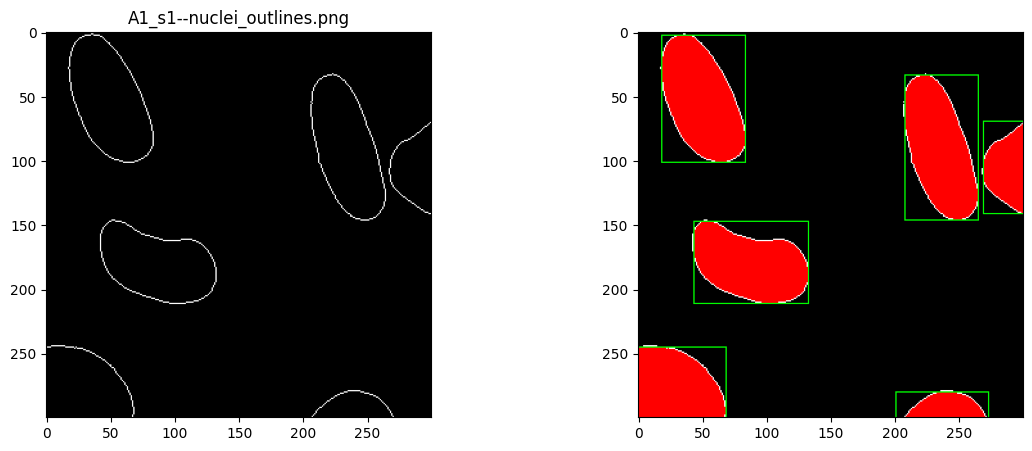

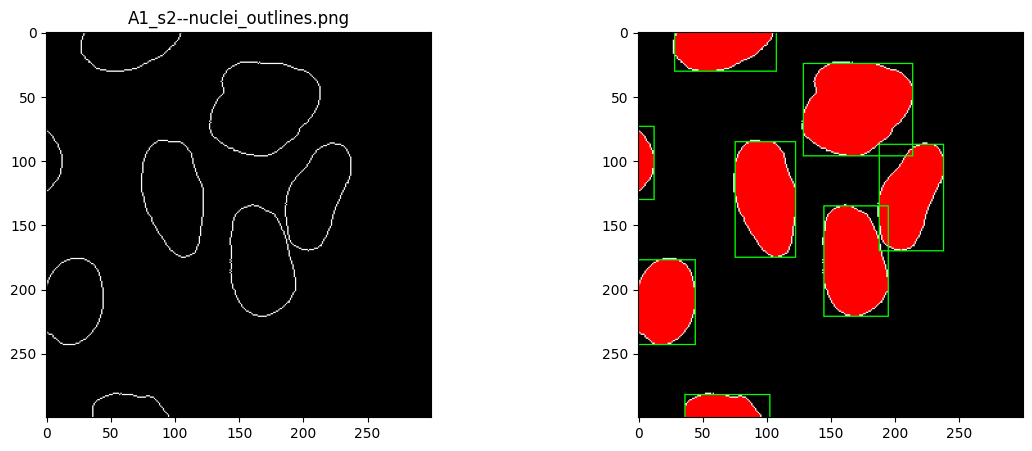

In [71]:
for image in nuclei_images:

  dir_path = join(csv_dir, image[3:5])
  dataframe = dataframeread(dir_path, 'Nuclei.csv')

  nuc_img = cv2.imread(join(nuc_dir, image))

  nuc_stats, masked_image = maskAndPolygonGenerator(nuc_img, image, dataframe)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
  ax1.imshow(nuc_img[300:600, 300:600])
  ax1.title.set_text(image)
  ax2.imshow(masked_image[300:600, 300:600])
  plt.show()

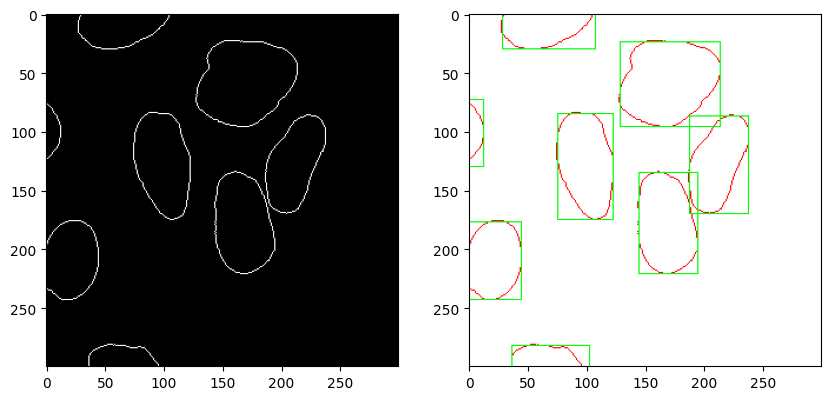

In [55]:
nuc_img = cv2.imread(join(nuc_dir, nuc_stats['image_id']))
contours = nuc_stats['contours']

blank = np.ones((nuc_img.shape)) * 255
blank = blank.astype(np.uint8)
cv2.drawContours(blank, contours, -1, (255, 0, 0), 1)

for box in nuc_stats['bounding_boxes']:

  top_left, bottom_right = box

  cv2.rectangle(blank, top_left, bottom_right, (0, 255, 0), 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,14))
ax1.imshow(nuc_img[300:600, 300:600])
ax2.imshow(blank[300:600, 300:600])
plt.show()

# Trying All Cell Images

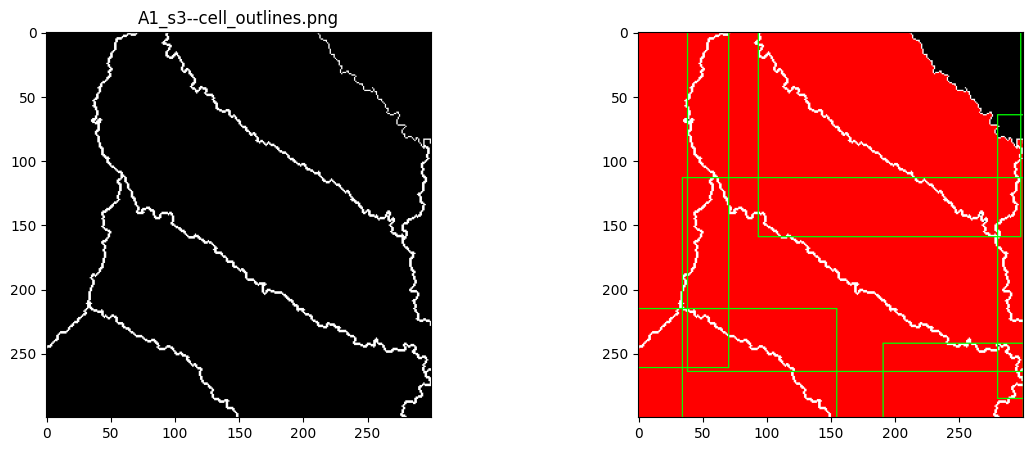

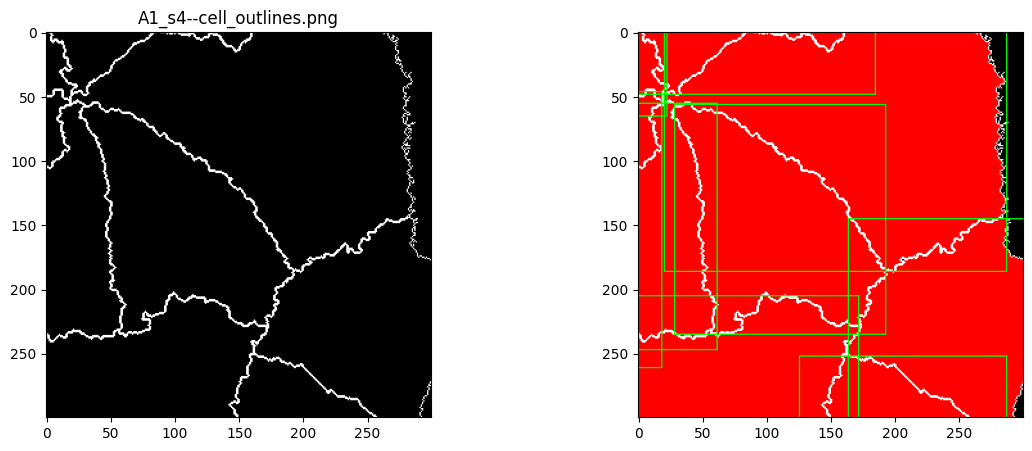

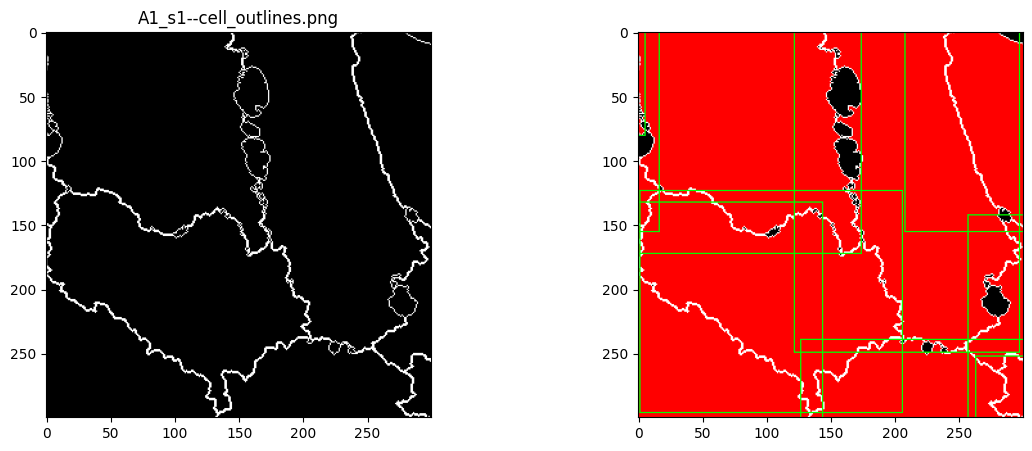

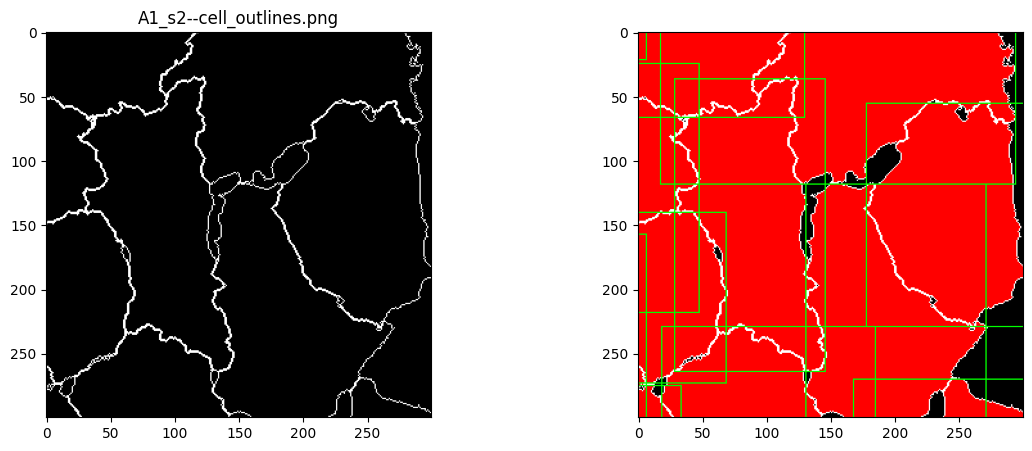

In [108]:
for image in cell_images:

  dir_path = join(csv_dir, image[3:5])
  dataframe = dataframeread(dir_path, 'Cells.csv')

  cell_img = cv2.imread(join(cell_dir, image))

  cell_stats, masked_image = maskAndPolygonGenerator(cell_img, image, dataframe)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
  ax1.imshow(cell_img[300:600, 300:600])
  ax1.title.set_text(image)
  ax2.imshow(masked_image[300:600, 300:600])
  plt.show()

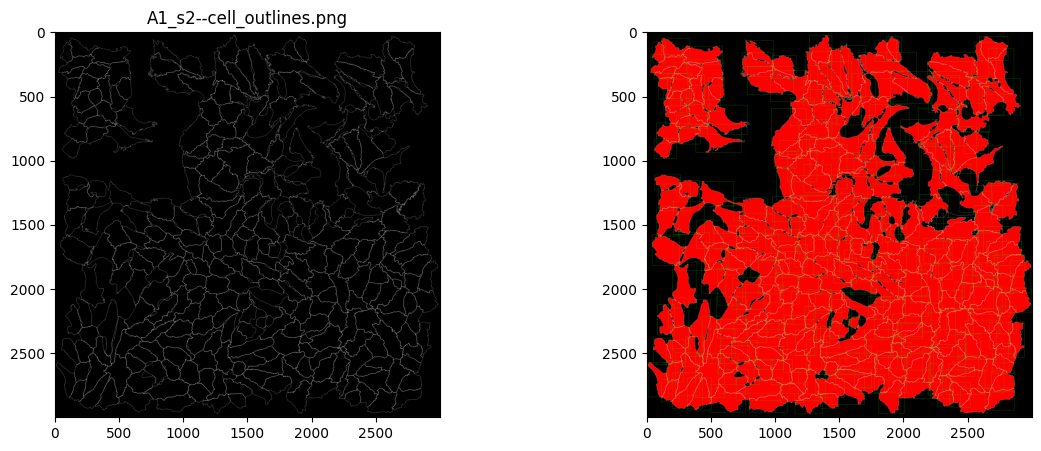

In [111]:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
  ax1.imshow(cell_img)
  ax1.title.set_text(image)
  ax2.imshow(masked_image)
  plt.show()